Project on data clustering on pokemon dataset
---
IU1841230034 - Nikhil Mittaliya

IU1841230037 - Jiten Parmar

IU1841230056 - Ved Suthar



Importing libraries and reading the data

In [1]:
library(tidyverse)
library(cluster)
library(gmodels)
rawData <- read_csv("../input/complete-pokemon-dataset-updated-090420/pokedex_(Update_05.20).csv")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.6     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  name = col_character(),
  german_name = col_character(),
  japanese_name = col_character(),
  status = col_character(),
  species = col_character(),
  type_1 = col_character(),
  type_2 = col_character(),
  ability_1 = col_character(),
  ability_2 = col_character(),
  ability_hidden = col_character(),
  growth_rate = col_character(),
  egg_type_1 = col_character(),
  egg_type_2 = col_character()
)
ℹ Use `spec()` for the full column s

Checking the dataset

In [2]:
head(rawData)

X1,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,⋯,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1,Bulbasaur,Bisasam,フシギダネ (Fushigidane),1,Normal,Seed Pokémon,2,Grass,⋯,1,2,2,1.0,1,1,1,1,1.0,0.5
1,2,Ivysaur,Bisaknosp,フシギソウ (Fushigisou),1,Normal,Seed Pokémon,2,Grass,⋯,1,2,2,1.0,1,1,1,1,1.0,0.5
2,3,Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,⋯,1,2,2,1.0,1,1,1,1,1.0,0.5
3,3,Mega Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,⋯,1,2,2,1.0,1,1,1,1,1.0,0.5
4,4,Charmander,Glumanda,ヒトカゲ (Hitokage),1,Normal,Lizard Pokémon,1,Fire,⋯,2,1,1,0.5,2,1,1,1,0.5,0.5
5,5,Charmeleon,Glutexo,リザード (Lizardo),1,Normal,Flame Pokémon,1,Fire,⋯,2,1,1,0.5,2,1,1,1,0.5,0.5


In [3]:
colnames(rawData)

[1] "X1"               "pokedex_number"   "name"             "german_name"     
 [5] "japanese_name"    "generation"       "status"           "species"         
 [9] "type_number"      "type_1"           "type_2"           "height_m"        
[13] "weight_kg"        "abilities_number" "ability_1"        "ability_2"       
[17] "ability_hidden"   "total_points"     "hp"               "attack"          
[21] "defense"          "sp_attack"        "sp_defense"       "speed"           
[25] "catch_rate"       "base_friendship"  "base_experience"  "growth_rate"     
[29] "egg_type_number"  "egg_type_1"       "egg_type_2"       "percentage_male" 
[33] "egg_cycles"       "against_normal"   "against_fire"     "against_water"   
[37] "against_electric" "against_grass"    "against_ice"      "against_fight"   
[41] "against_poison"   "against_ground"   "against_flying"   "against_psychic" 
[45] "against_bug"      "against_rock"     "against_ghost"    "against_dragon"  
[49] "against_dark"     "against_steel"    "against_fairy"

Checking the total_points column which can be clustered

In [4]:
summary(rawData$total_points)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  175.0   330.0   455.0   437.6   510.0  1125.0 

Checking status of pokemons

In [5]:
unique(rawData$status)

[1] "Normal"        "Sub Legendary" "Legendary"     "Mythical"

Counting null values in the data frame

In [6]:
sum(is.na(rawData$total_points))

[1] 0

**Using K-means clustering on total_points**

Scaling the data

In [7]:
scaled_total_points <- scale(rawData$total_points)

summary(scaled_total_points)

       V1         
 Min.   :-2.1582  
 1st Qu.:-0.8842  
 Median : 0.1432  
 Mean   : 0.0000  
 3rd Qu.: 0.5953  
 Max.   : 5.6502  

Setting seed for random variables, so that it runs same on every run

In [8]:
set.seed(343756)

Making kmeans cluster

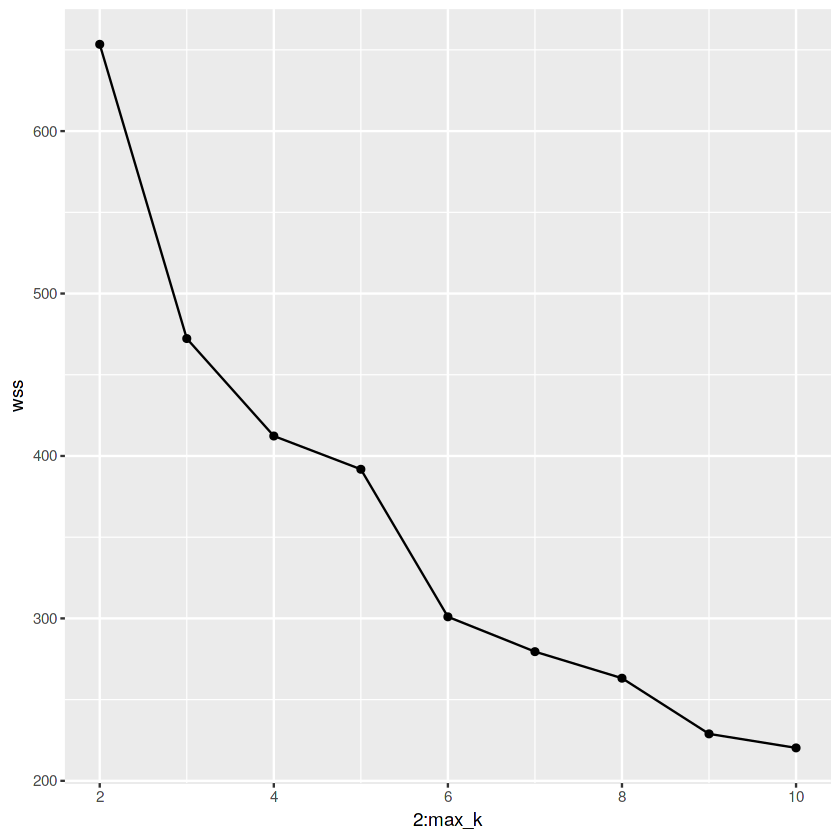

In [9]:
max_k <- 10
kmean_withinss <- function(k) {
    fit <- kmeans(scaled_total_points,k,100,25)
    return (fit$tot.withinss*k)
}
wss <- sapply(2:max_k, kmean_withinss)
ggplot(data.frame(2:max_k, wss),aes(x=2:max_k,y=wss))+ geom_point() + geom_line()

From the above graph we could see k=4 gives best result

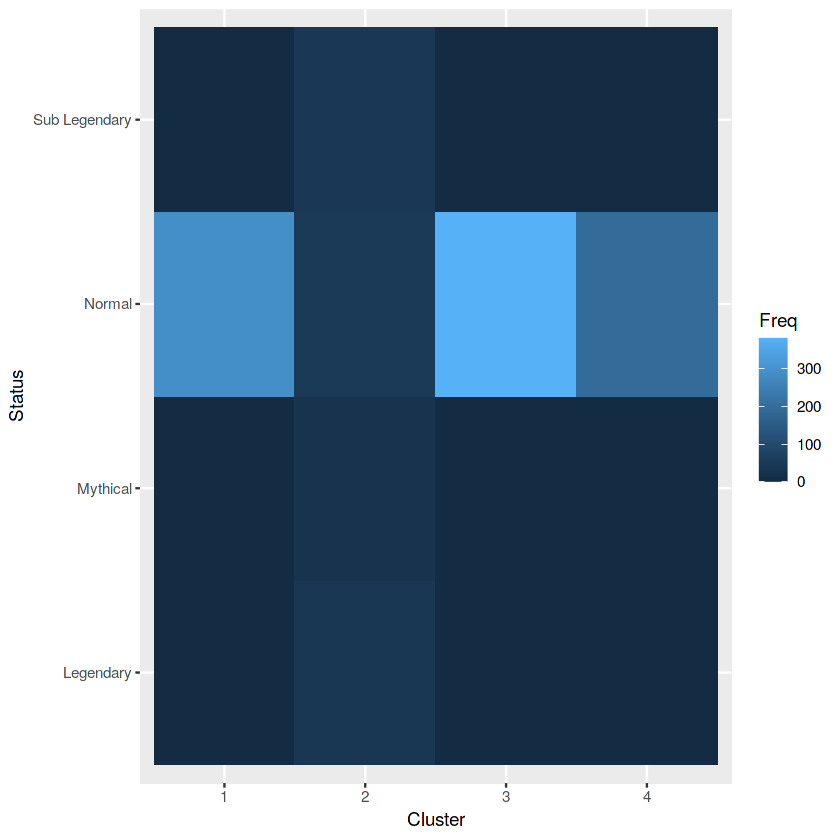

In [10]:
fit <- kmeans(scaled_total_points,4,100,25)
res<-as.data.frame(table(fit$cluster,rawData$status))

ggplot(res,aes(Var1,Var2))+geom_tile(aes(fill=Freq))+labs(x="Cluster",y="Status")


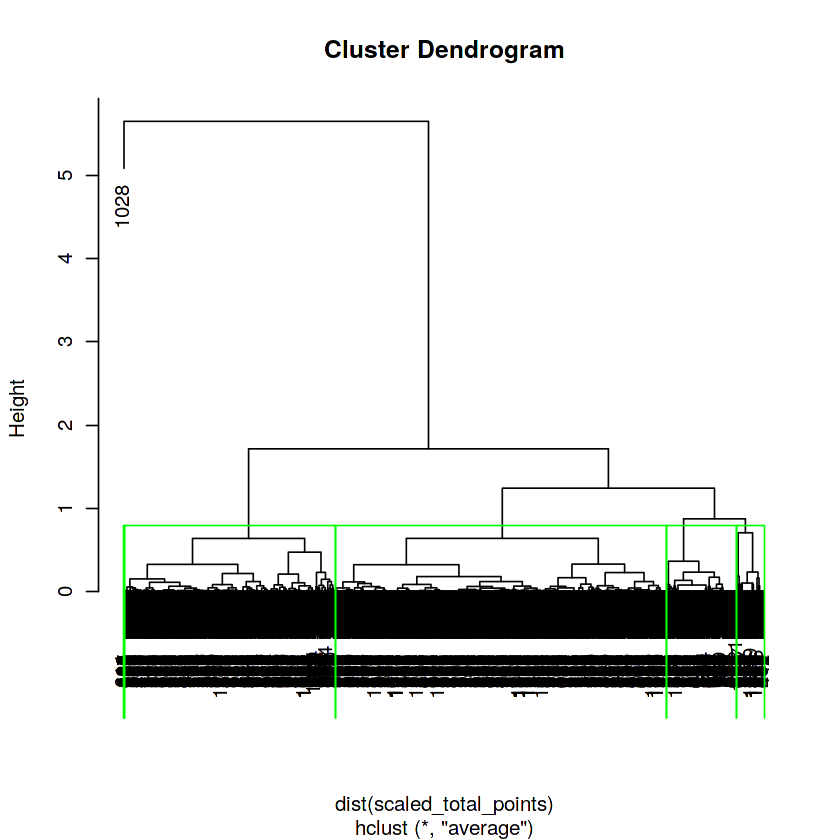

In [11]:
hc <- hclust(dist(scaled_total_points),"average")
fit <- cutree(hc,k=5)
plot(hc)
rect.hclust(hc, k = 5, border = "green") 


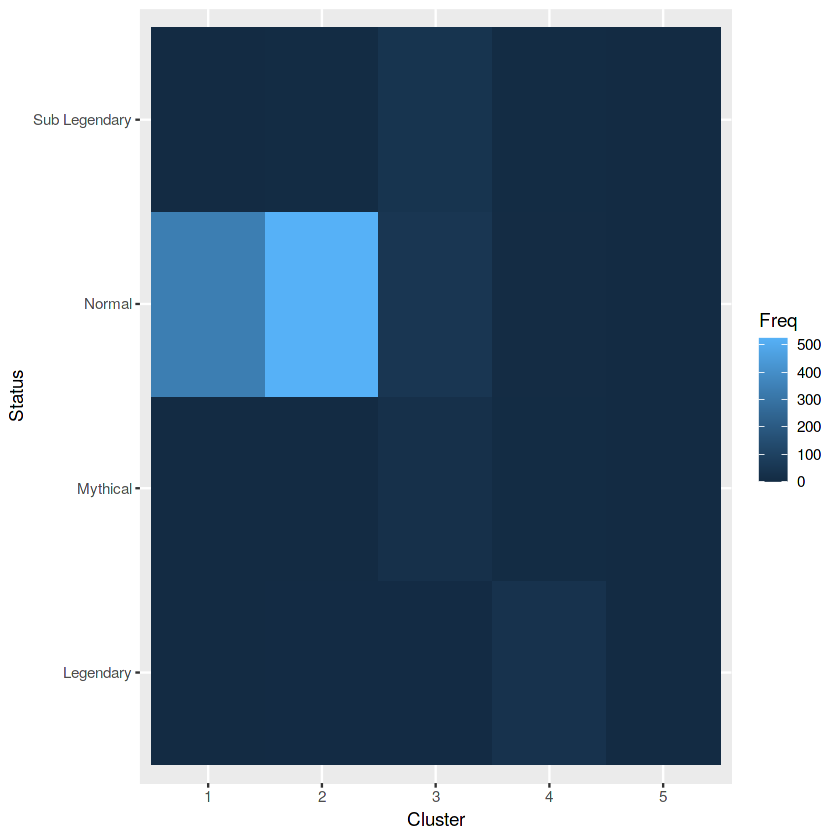

In [12]:
res<-as.data.frame(table(fit,rawData$status))
ggplot(res,aes(fit,Var2))+geom_tile(aes(fill=Freq))+labs(x="Cluster",y="Status")

Clustering on rates // Catch rate and Growth rate

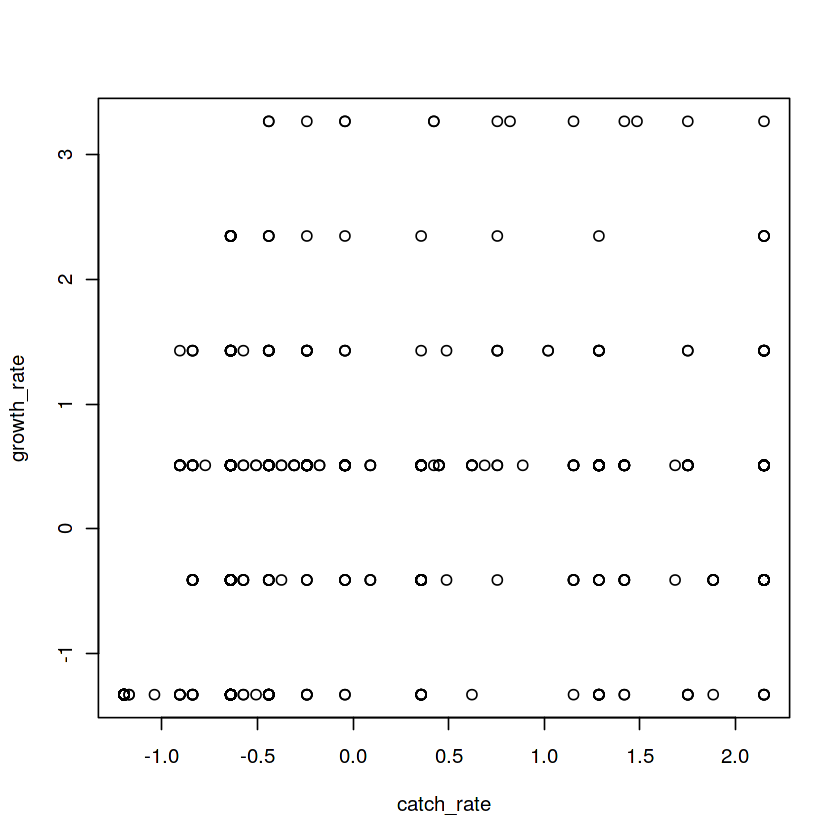

In [13]:
filteredData=na.omit(rawData[,c("catch_rate","growth_rate")])



filteredData$growth_rate[which(filteredData$growth_rate=="Slow")] <- 0
filteredData$growth_rate[which(filteredData$growth_rate=="Medium Slow")] <- 1
filteredData$growth_rate[which(filteredData$growth_rate=="Medium Fast")] <- 2
filteredData$growth_rate[which(filteredData$growth_rate=="Fast")] <- 3
filteredData$growth_rate[which(filteredData$growth_rate=="Erratic")] <- 4
filteredData$growth_rate[which(filteredData$growth_rate=="Fluctuating")] <- 5

filteredData$growth_rate=as.numeric(filteredData$growth_rate)

filteredData=scale(filteredData)

plot(filteredData)

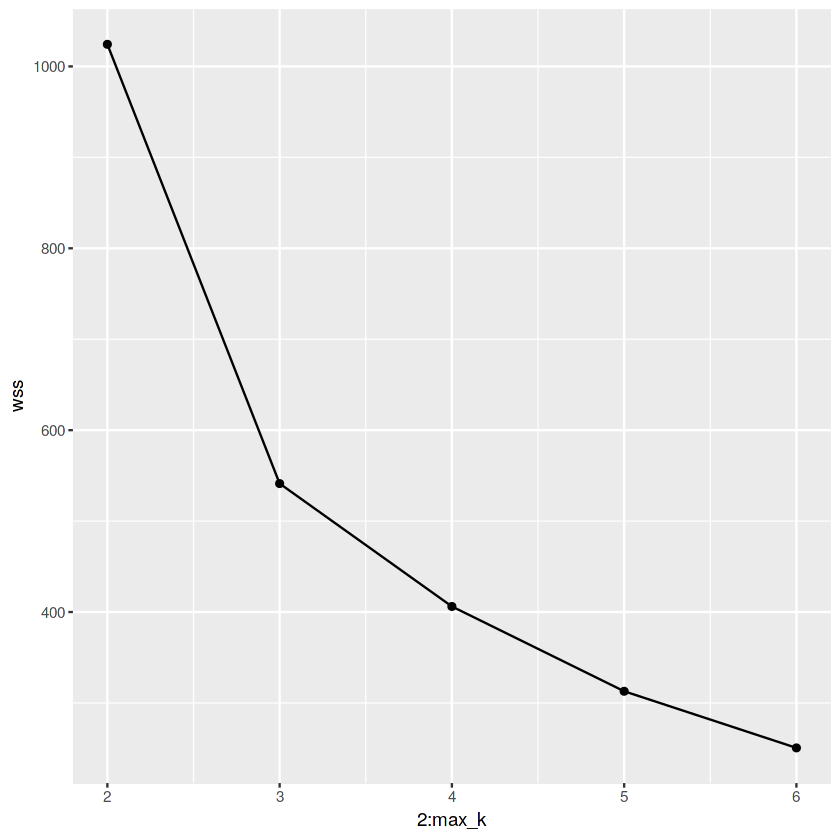

In [14]:
max_k <- 6
kmean_withinss <- function(k) {
    fit <- kmeans(filteredData,k,100,25)
    return (fit$tot.withinss)
}
wss <- sapply(2:max_k, kmean_withinss)
ggplot(data.frame(2:max_k, wss),aes(x=2:max_k,y=wss))+ geom_point() + geom_line()

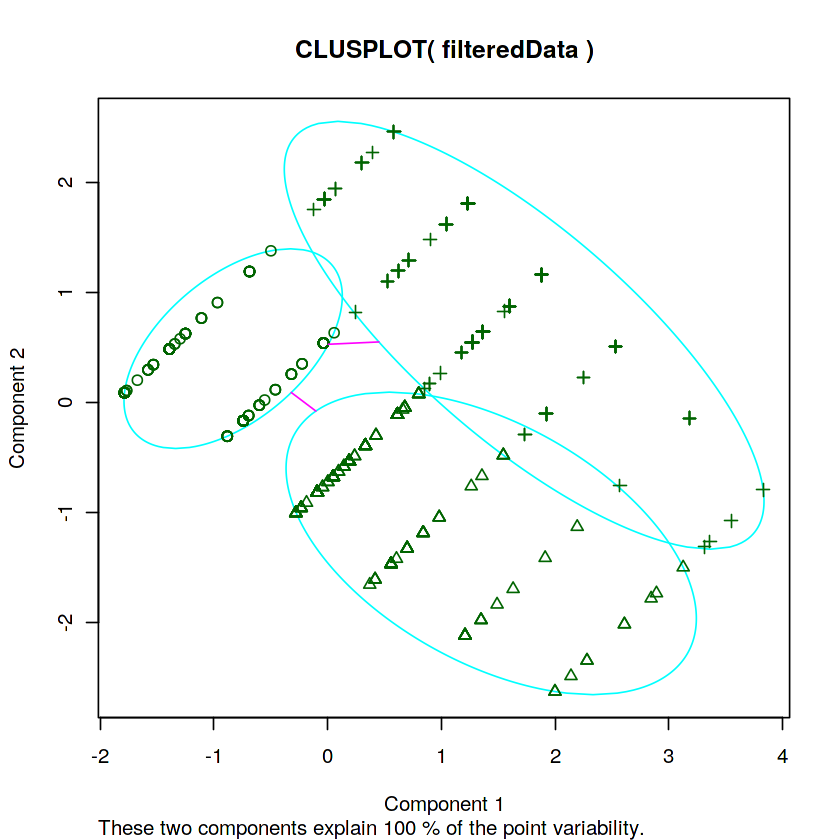

In [15]:
fit <- kmeans(filteredData,3,100,25)
clusplot(filteredData,fit$cluster)

Clustering on different abilities of the pokemons

In [16]:
filteredData = data.frame(scale(na.omit(rawData[,c('hp','attack','defense','sp_attack','sp_defense','speed')])))
summary(filteredData)

       hp              attack           defense          sp_attack      
 Min.   :-2.5990   Min.   :-2.3205   Min.   :-2.2194   Min.   :-1.9197  
 1st Qu.:-0.7420   1st Qu.:-0.7760   1st Qu.:-0.7819   1st Qu.:-0.6957  
 Median :-0.1166   Median :-0.1273   Median :-0.1430   Median :-0.2366  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.3950   3rd Qu.: 0.6141   3rd Qu.: 0.4959   3rd Qu.: 0.6814  
 Max.   : 7.0273   Max.   : 3.3943   Max.   : 5.6072   Max.   : 3.7110  
   sp_defense           speed        
 Min.   :-1.85632   Min.   :-2.1319  
 1st Qu.:-0.78808   1st Qu.:-0.7897  
 Median :-0.07593   Median :-0.1186  
 Mean   : 0.00000   Mean   : 0.0000  
 3rd Qu.: 0.63623   3rd Qu.: 0.7203  
 Max.   : 6.33349   Max.   : 3.7402  

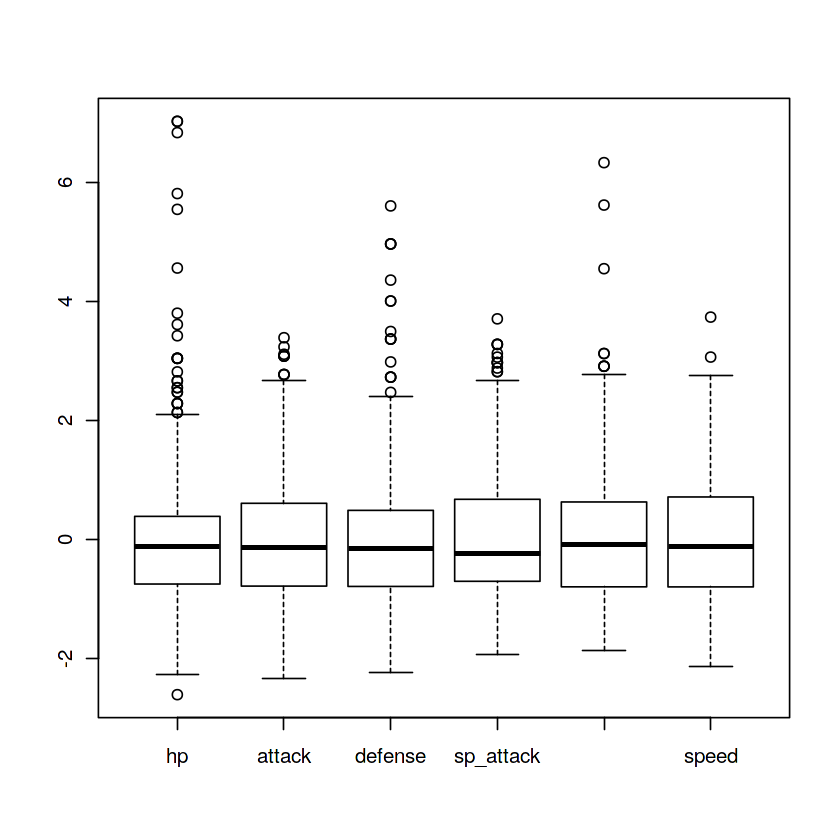

In [17]:
boxplot(filteredData)

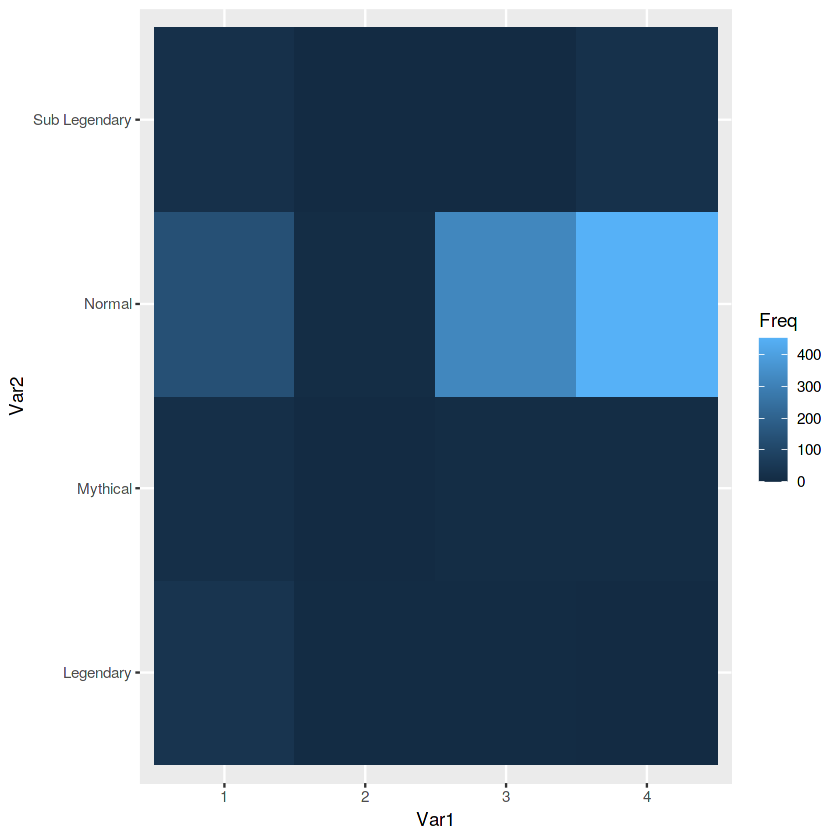

In [18]:
fit <- kmeans(filteredData$hp,4,100,25)
res<-as.data.frame(table(fit$cluster,rawData$status))
ggplot(res,aes(Var1,Var2))+geom_tile(aes(fill=Freq))

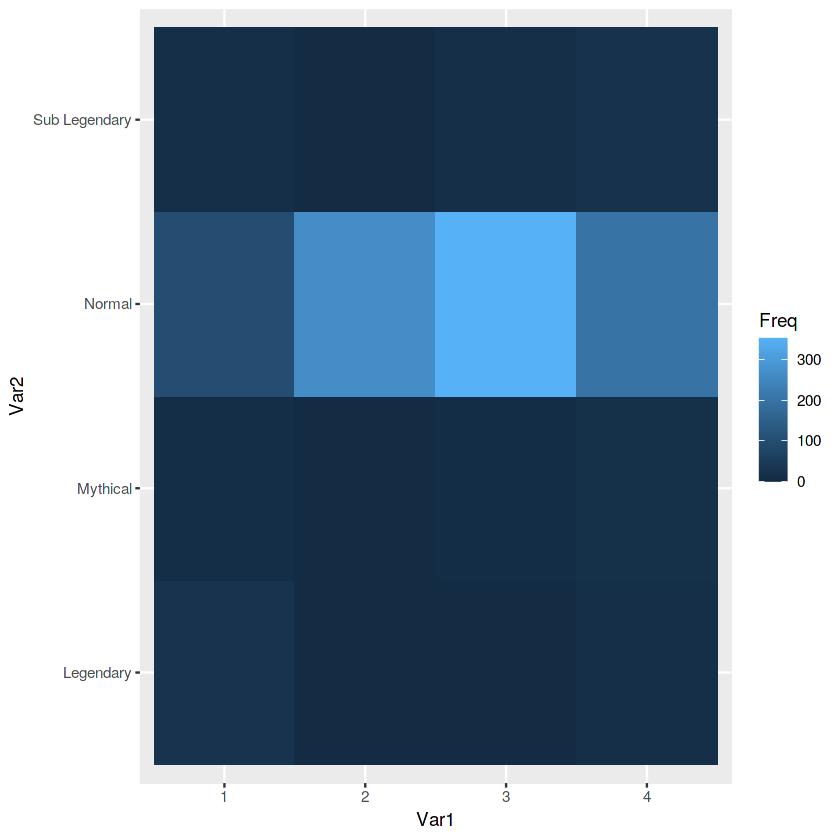

In [19]:
fit <- kmeans(filteredData$attack,4,100,25)
res<-as.data.frame(table(fit$cluster,rawData$status))
ggplot(res,aes(Var1,Var2))+geom_tile(aes(fill=Freq))

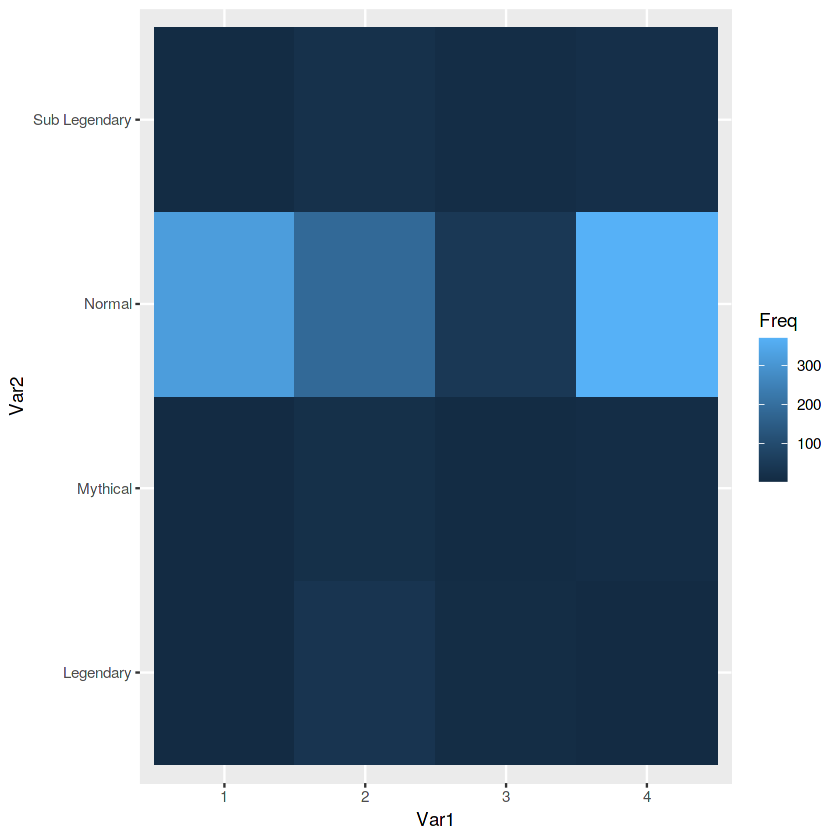

In [20]:
fit <- kmeans(filteredData$defense,4,100,25)
res<-as.data.frame(table(fit$cluster,rawData$status))
ggplot(res,aes(Var1,Var2))+geom_tile(aes(fill=Freq))

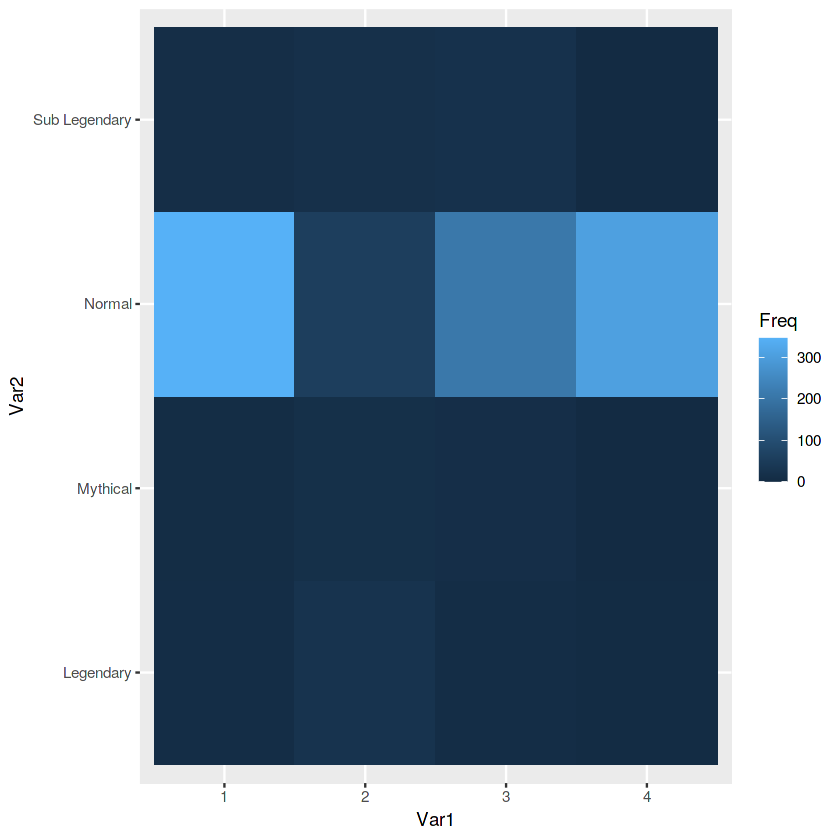

In [21]:
fit <- kmeans(filteredData$sp_attack,4,100,25)
res<-as.data.frame(table(fit$cluster,rawData$status))
ggplot(res,aes(Var1,Var2))+geom_tile(aes(fill=Freq))

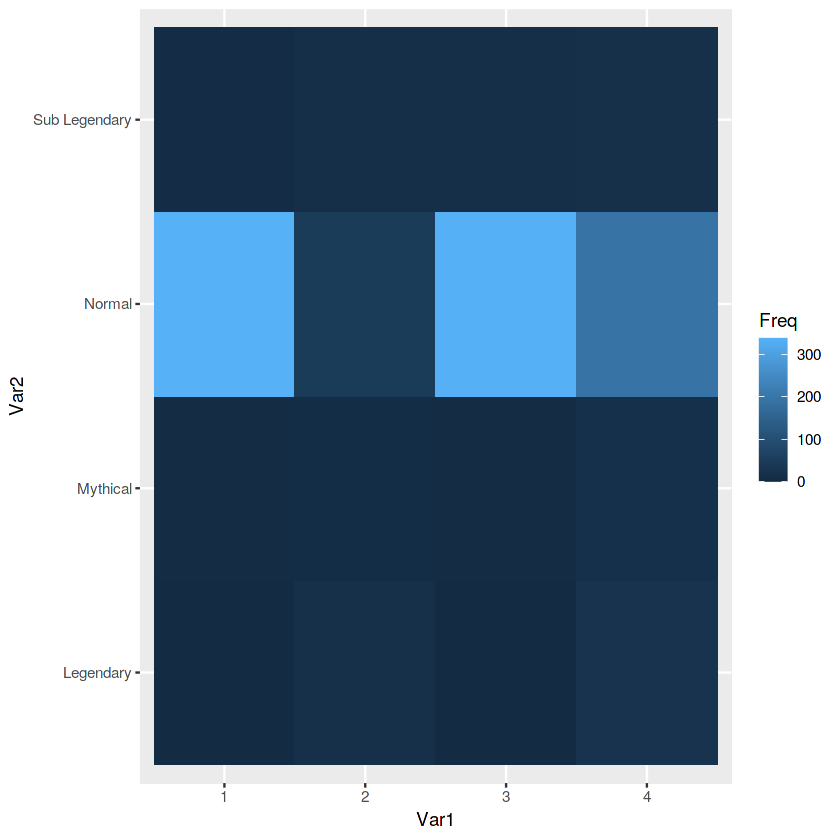

In [22]:
fit <- kmeans(filteredData$sp_defense,4,100,25)
res<-as.data.frame(table(fit$cluster,rawData$status))
ggplot(res,aes(Var1,Var2))+geom_tile(aes(fill=Freq))

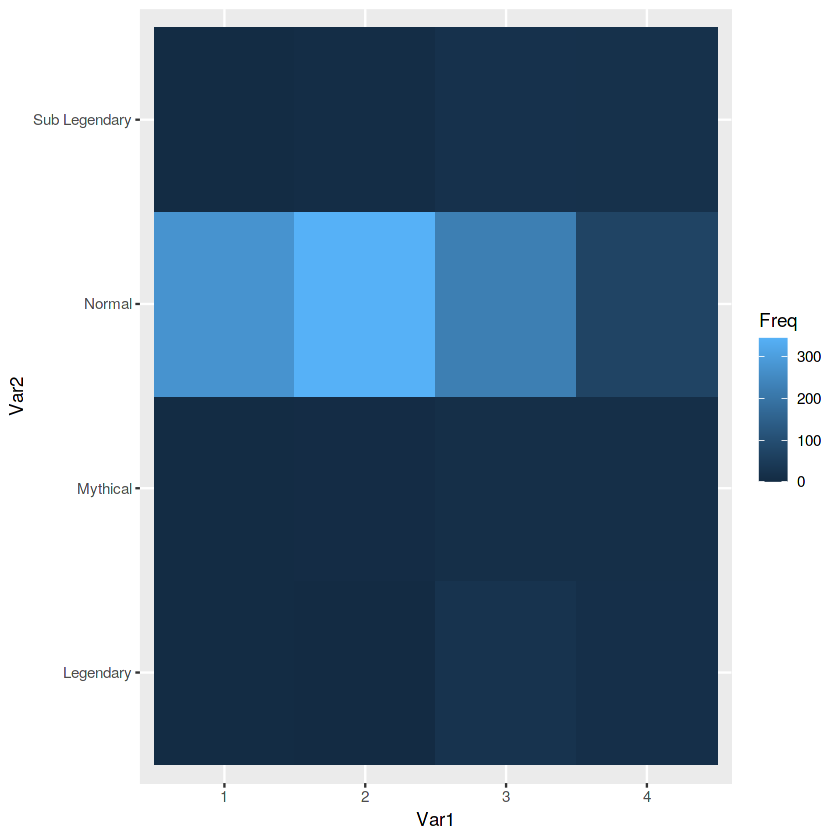

In [23]:
fit <- kmeans(filteredData$speed,4,100,25)
res<-as.data.frame(table(fit$cluster,rawData$status))
ggplot(res,aes(Var1,Var2))+geom_tile(aes(fill=Freq))

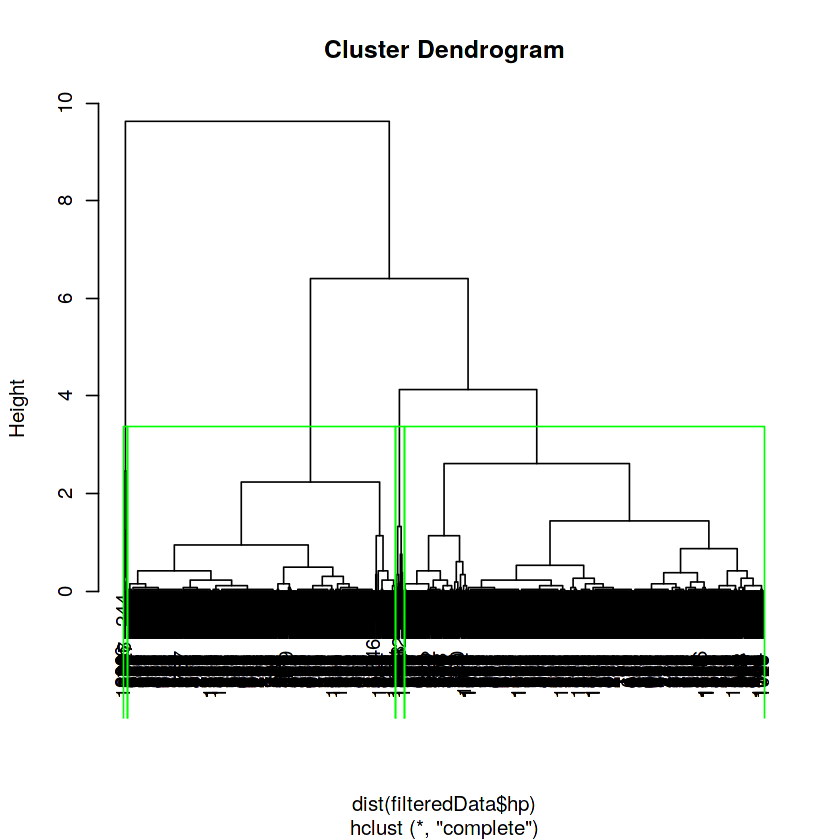

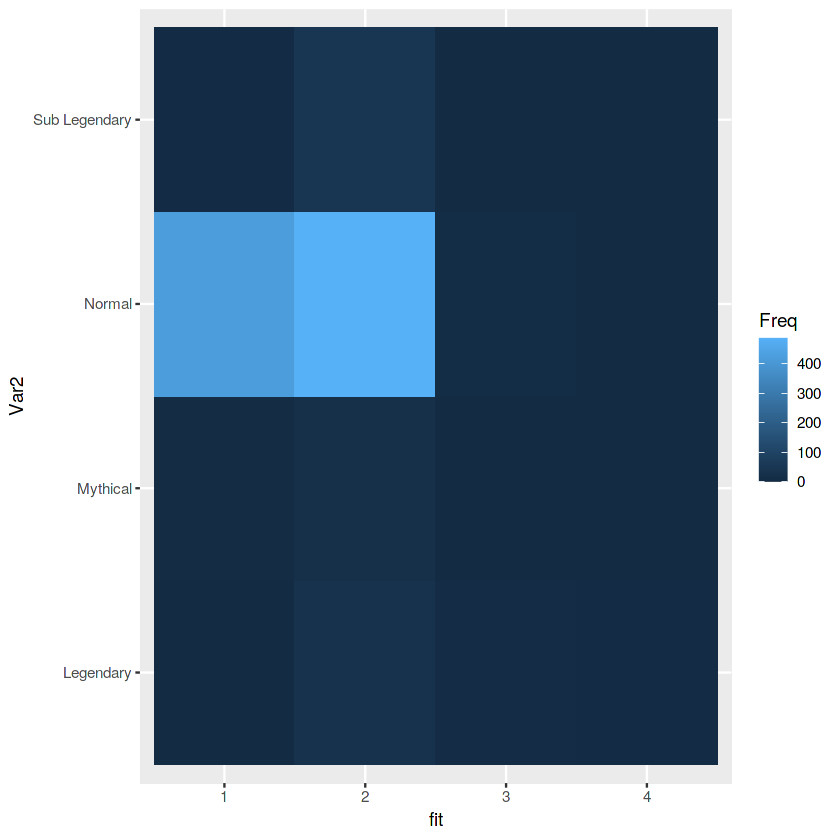

In [24]:
hc <- hclust(dist(filteredData$hp),"complete")
fit <- cutree(hc,k=4)
plot(hc)
rect.hclust(hc, k = 4, border = "green") 
res<-as.data.frame(table(fit,rawData$status))
ggplot(res,aes(fit,Var2))+geom_tile(aes(fill=Freq))

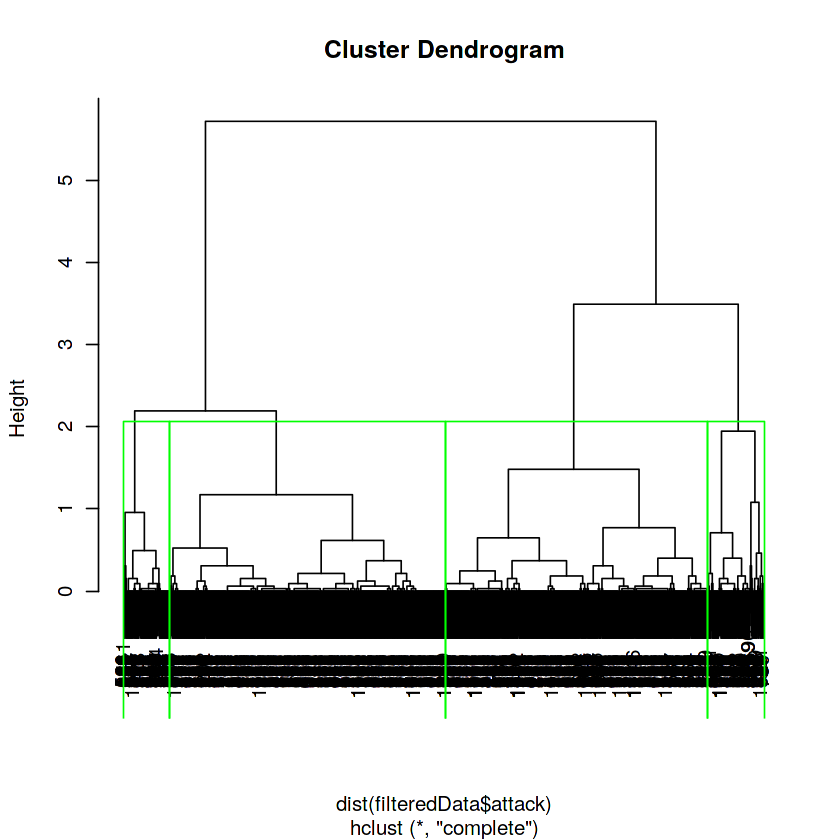

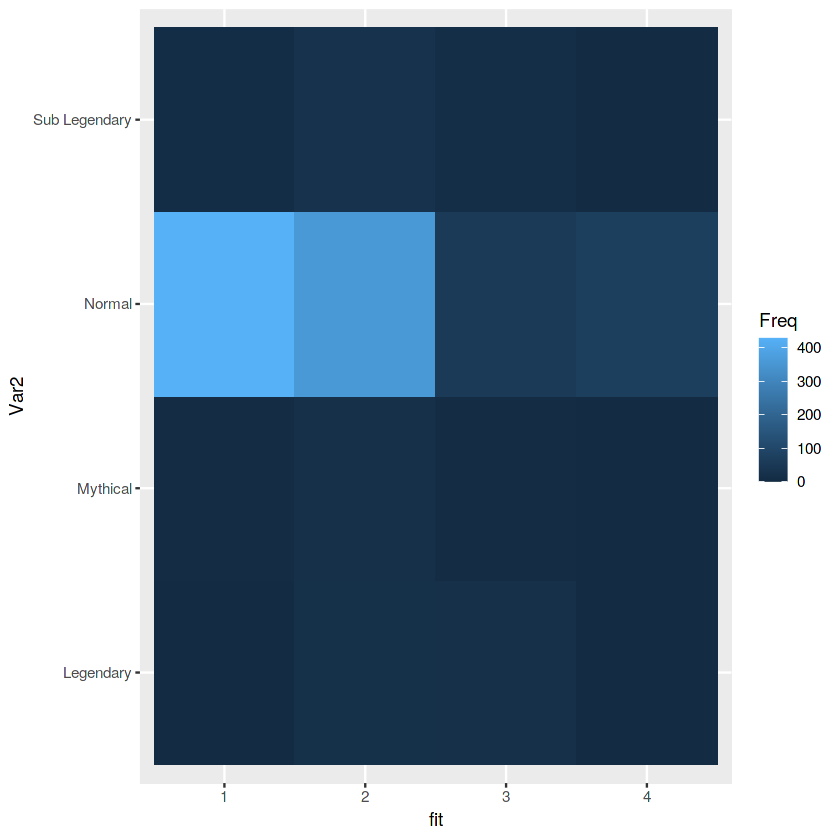

In [25]:
hc <- hclust(dist(filteredData$attack),"complete")
fit <- cutree(hc,k=4)
plot(hc)
rect.hclust(hc, k = 4, border = "green") 
res<-as.data.frame(table(fit,rawData$status))
ggplot(res,aes(fit,Var2))+geom_tile(aes(fill=Freq))

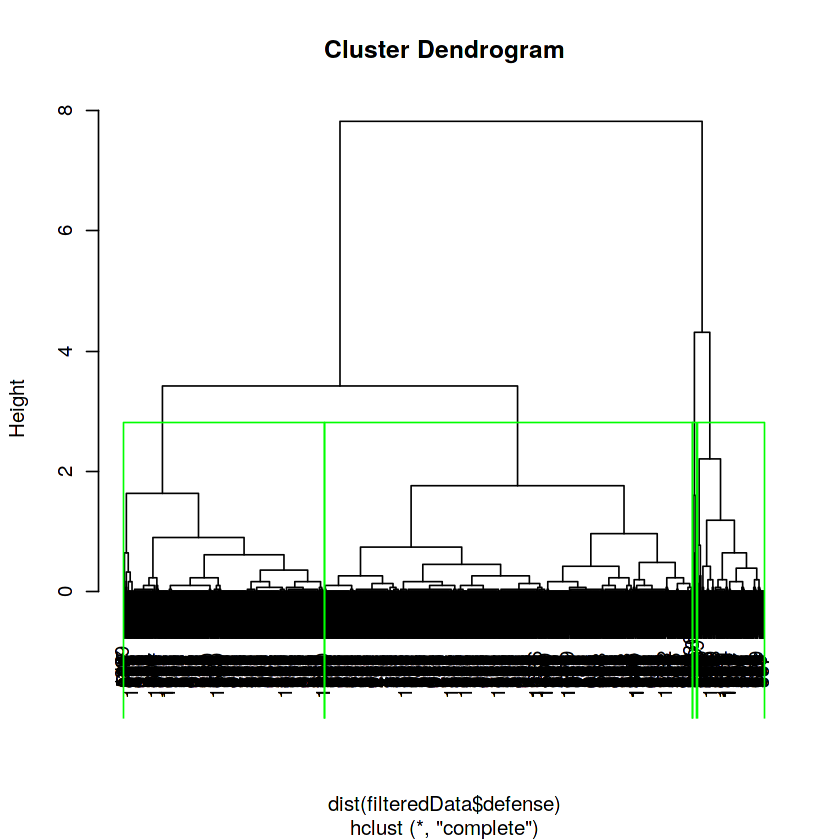

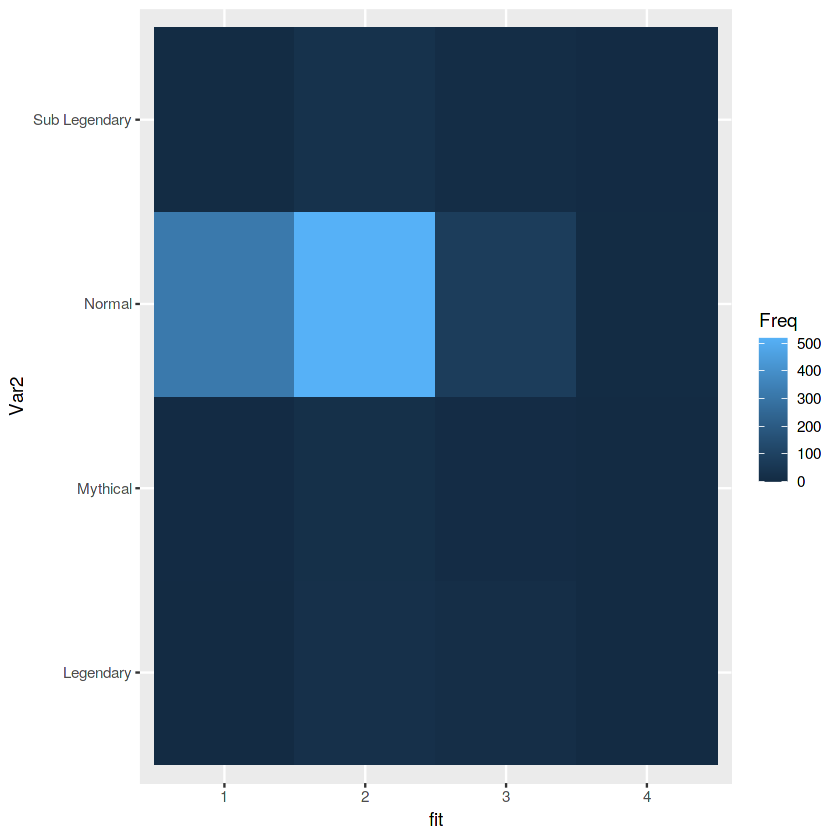

In [26]:
hc <- hclust(dist(filteredData$defense),"complete")
fit <- cutree(hc,k=4)
plot(hc)
rect.hclust(hc, k = 4, border = "green") 
res<-as.data.frame(table(fit,rawData$status))
ggplot(res,aes(fit,Var2))+geom_tile(aes(fill=Freq))

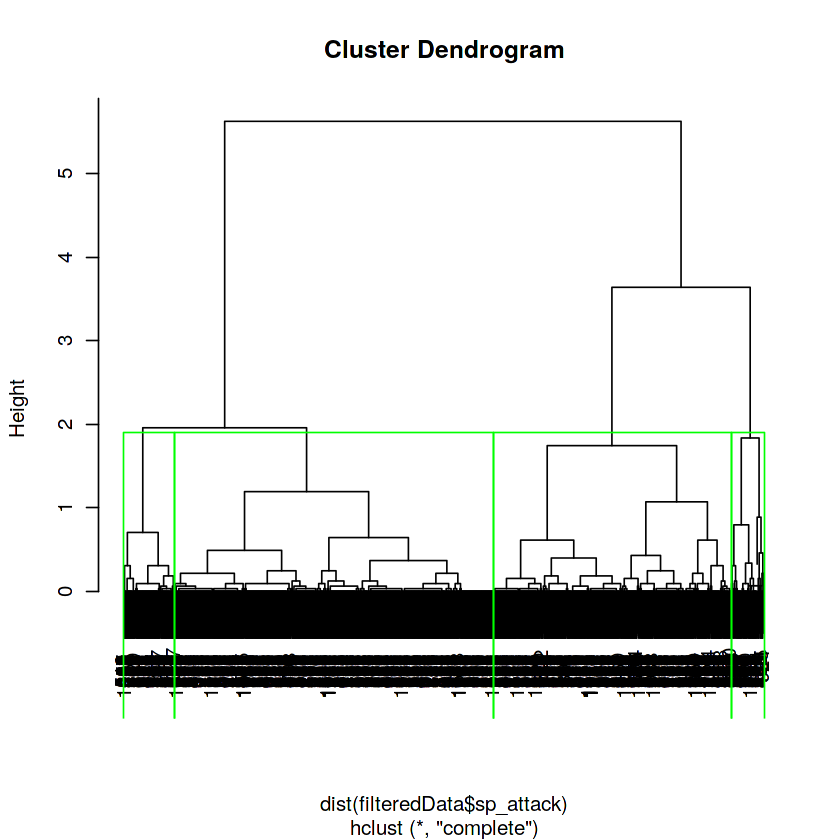

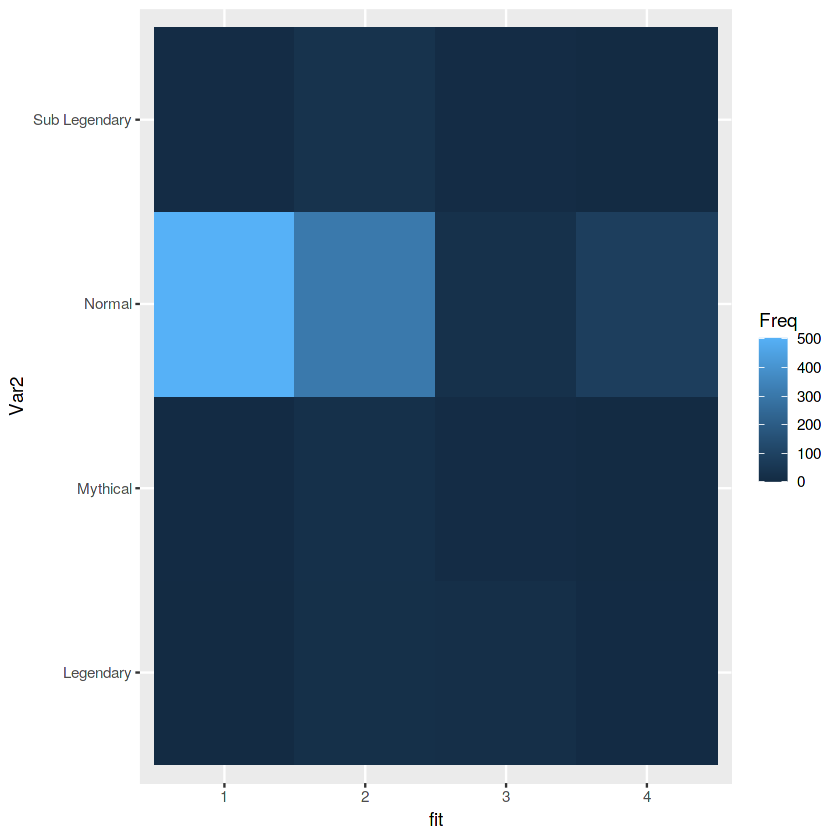

In [27]:
hc <- hclust(dist(filteredData$sp_attack),"complete")
fit <- cutree(hc,k=4)
plot(hc)
rect.hclust(hc, k = 4, border = "green") 
res<-as.data.frame(table(fit,rawData$status))
ggplot(res,aes(fit,Var2))+geom_tile(aes(fill=Freq))

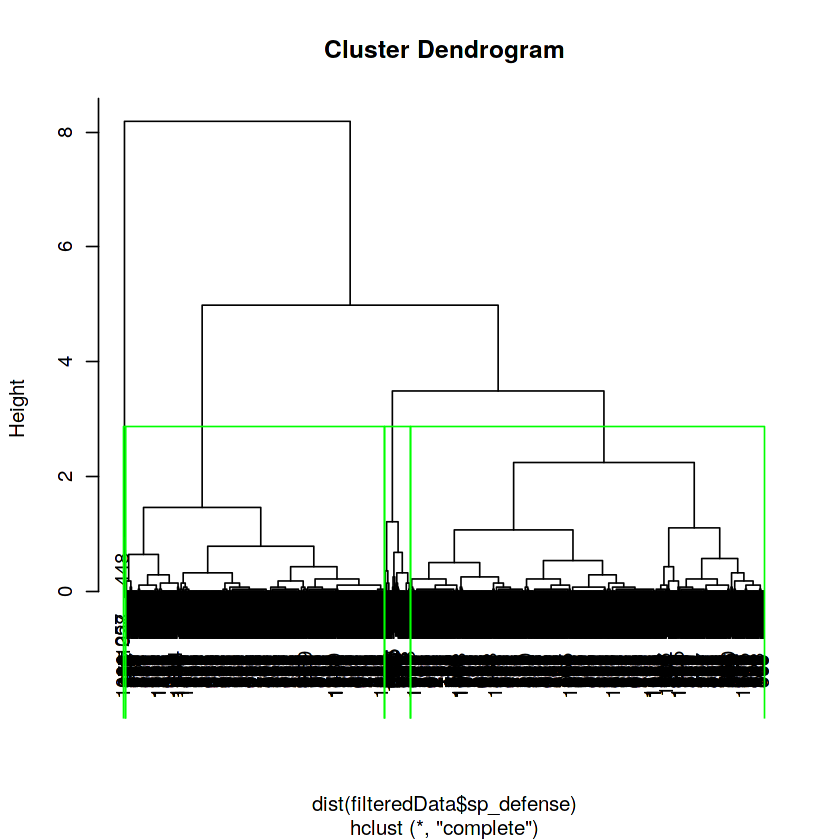

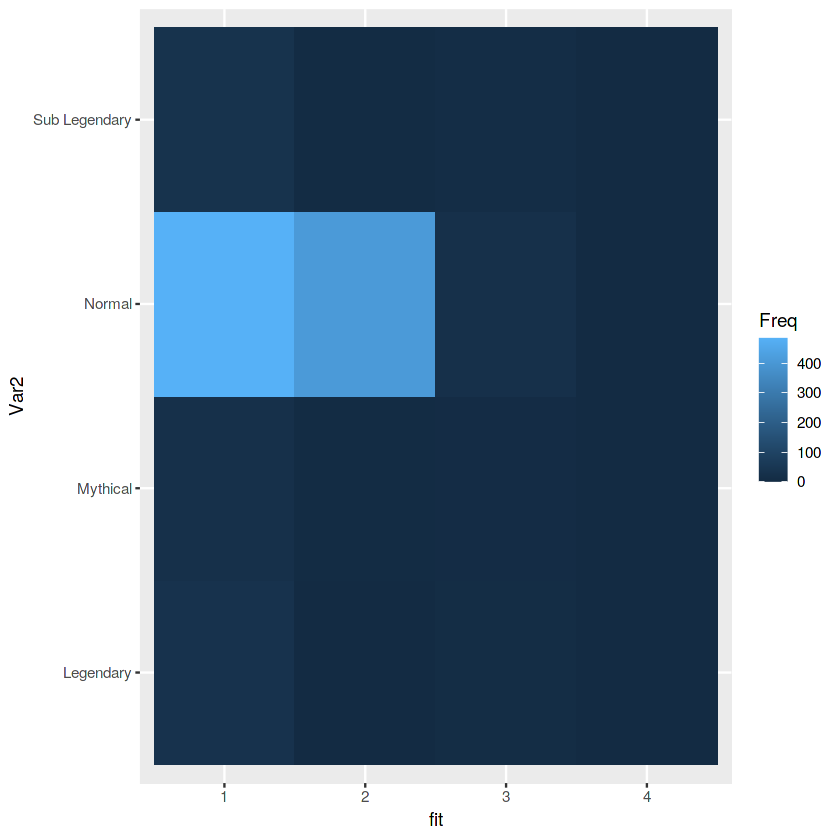

In [28]:
hc <- hclust(dist(filteredData$sp_defense),"complete")
fit <- cutree(hc,k=4)
plot(hc)
rect.hclust(hc, k = 4, border = "green") 
res<-as.data.frame(table(fit,rawData$status))
ggplot(res,aes(fit,Var2))+geom_tile(aes(fill=Freq))

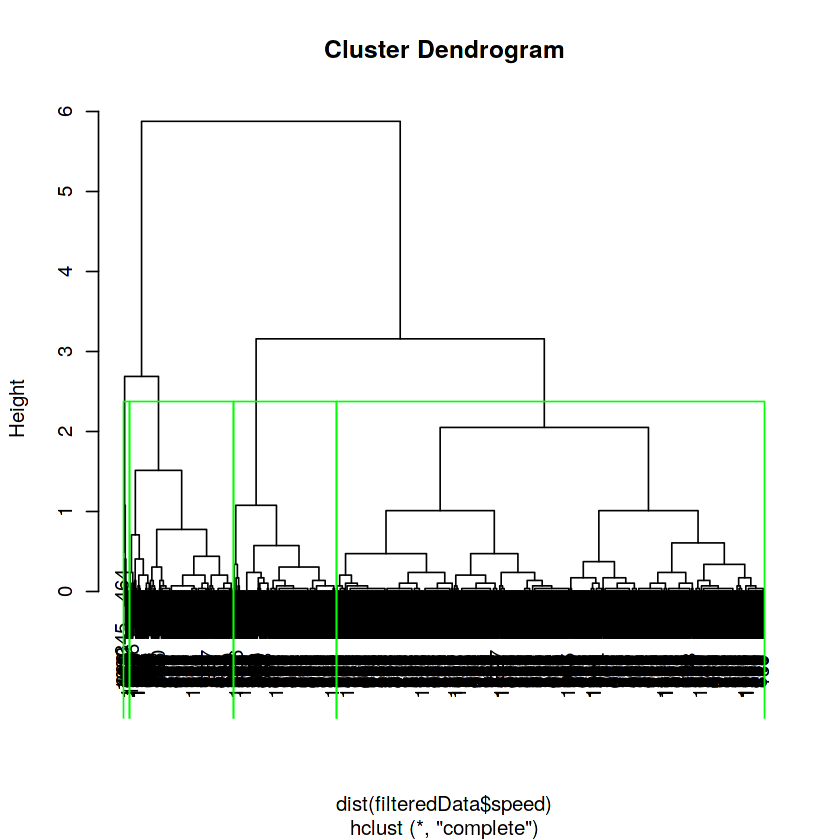

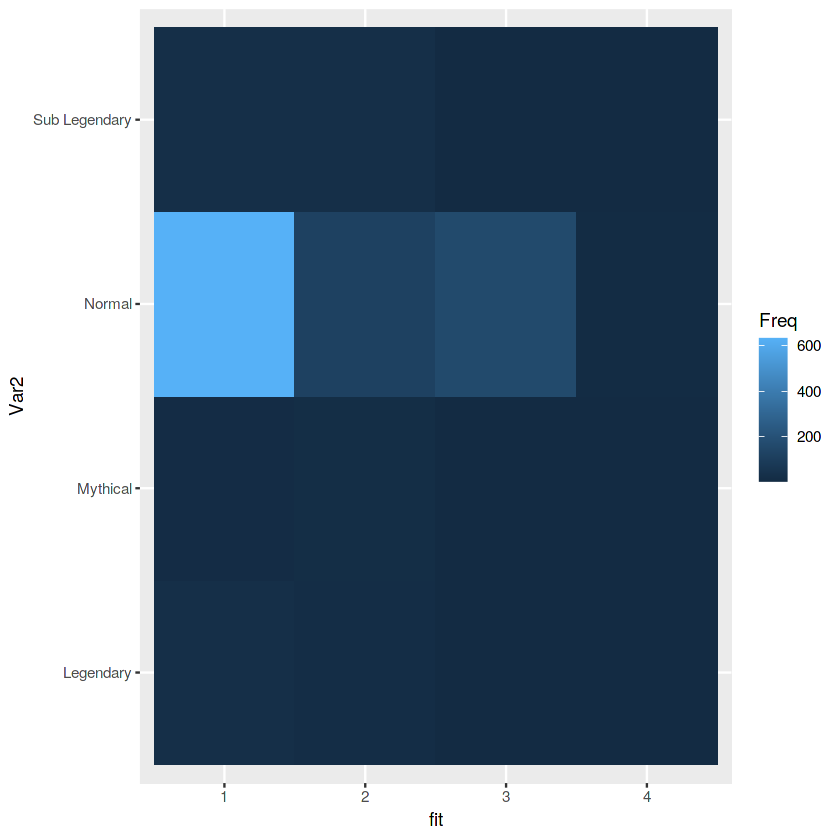

In [29]:
hc <- hclust(dist(filteredData$speed),"complete")
fit <- cutree(hc,k=4)
plot(hc)
rect.hclust(hc, k = 4, border = "green") 
res<-as.data.frame(table(fit,rawData$status))
ggplot(res,aes(fit,Var2))+geom_tile(aes(fill=Freq))

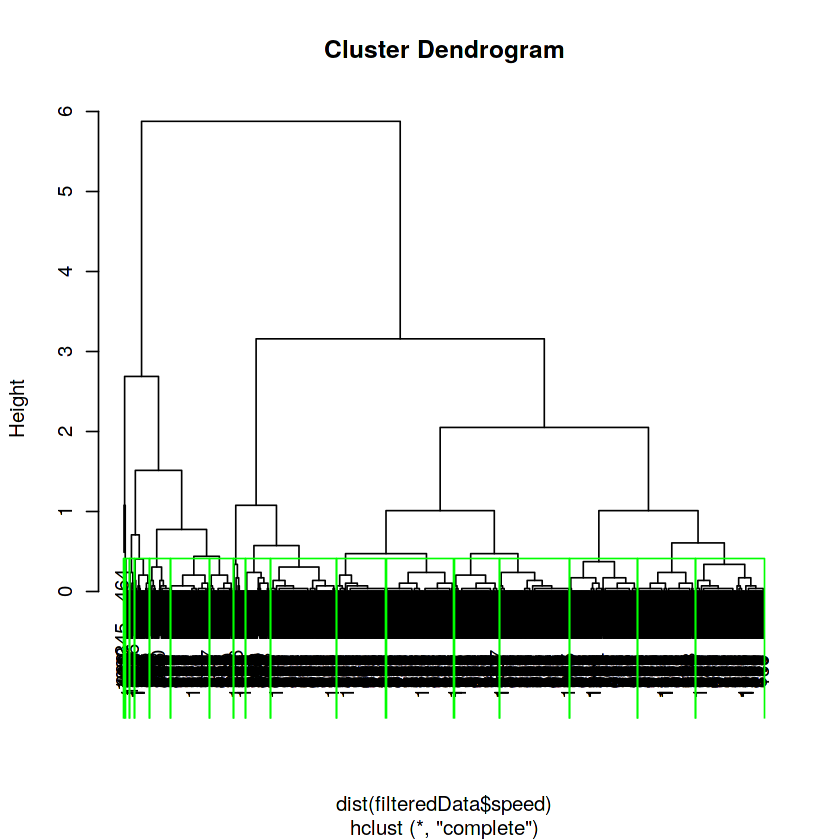

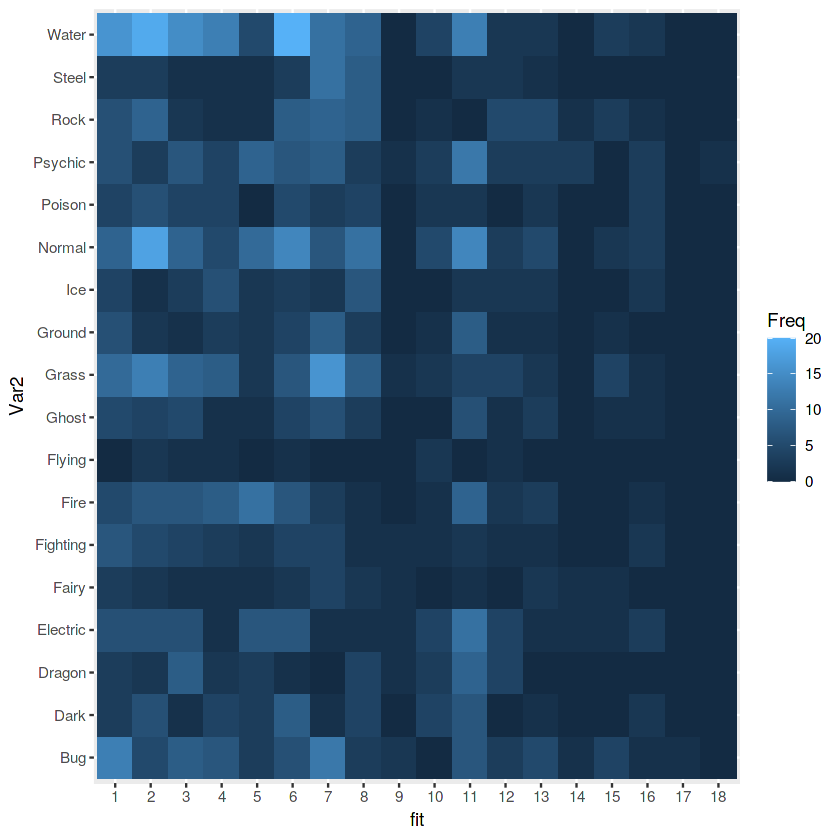

In [30]:
hc <- hclust(dist(filteredData$speed),"complete")
fit <- cutree(hc,k=18)
plot(hc)
rect.hclust(hc, k = 18, border = "green") 
res<-as.data.frame(table(fit,rawData$type_1))
ggplot(res,aes(fit,Var2))+geom_tile(aes(fill=Freq))

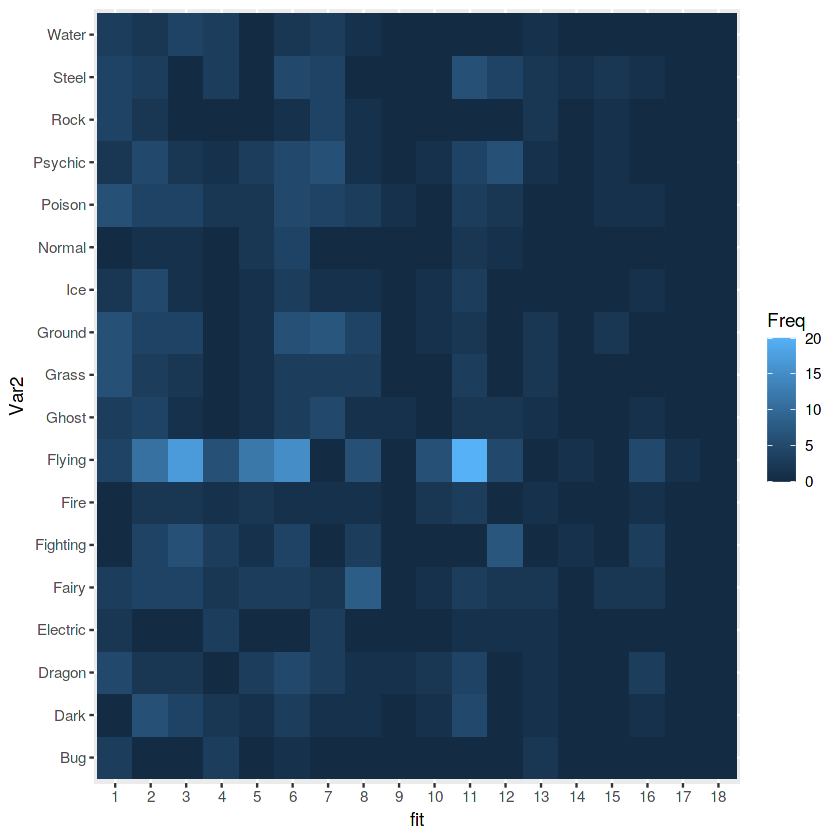

In [31]:
res<-as.data.frame(table(fit,rawData$type_2))
ggplot(res,aes(fit,Var2))+geom_tile(aes(fill=Freq))